## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import max_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
#from sklearn.tree import DecisionTreeRegressor, plot_tree
#from sklearn.ensemble import RandomForestRegressor

## Functions

In [4]:
def sk_model_reg(model, data, target, random_state=112358, stratify=False, test_size=0.2, prep=True, scaler=StandardScaler(), train=True, test=True):
    """
    Predict on train and test, print metrics
    
    Keyword arguments:
    model : sklearn classifier
    data : X
    target : y
    stratify : stratify target
    norm : use StandardScaler
    train : print train metrics
    test : print test metrics
    """  
    if stratify:
        X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=test_size, random_state=random_state)
    else:
        X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=random_state)
    if prep:
        sc = scaler.fit(X_train)
        X_train = sc.transform(X_train)
        X_test = sc.transform(X_test)       
    model.fit(X_train, y_train)   
    if train:
        pred_train = model.predict(X_train)
        print('TRAIN:')
        print(f'MAE:\t\t{mean_absolute_error(y_train, pred_train)}')
        print(f'MAPE:\t\t{mean_absolute_percentage_error(y_train, pred_train)}')
        print(f'MSE:\t\t{mean_squared_error(y_train, pred_train)}')
        print(f'Max error:\t{max_error(y_train, pred_train)}')
    if test:
        pred_test = model.predict(X_test)
        print('TRAIN:')
        print(f'MAE:\t\t{mean_absolute_error(y_test, pred_test)}')
        print(f'MAPE:\t\t{mean_absolute_percentage_error(y_test, pred_test)}')
        print(f'MSE:\t\t{mean_squared_error(y_test, pred_test)}')
        print(f'Max error:\t{max_error(y_test, pred_test)}')
        
    return model

## Data

In [5]:
trn = pd.read_csv('IOWA/train.csv')
trn.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1032,1033,60,RL,NaN,14541,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1993,1993,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,1012,Unf,0,326,1338,GasA,Ex,Y,SBrkr,1352,1168,0,2520,1,0,2,1,5,1,Gd,10,Typ,1,TA,Attchd,1993.0,RFn,3,796,TA,TA,Y,209,55,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,310000
776,777,20,RL,86.0,11210,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,240.0,Gd,TA,PConc,Gd,TA,Av,GLQ,20,Unf,0,1594,1614,GasA,Ex,Y,SBrkr,1614,0,0,1614,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,RFn,3,865,TA,TA,Y,144,59,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,221500
1194,1195,60,RL,80.0,9364,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,7,1969,1969,Gable,CompShg,HdBoard,HdBoard,Stone,143.0,TA,TA,CBlock,TA,TA,No,ALQ,371,Unf,0,292,663,GasA,TA,Y,SBrkr,663,689,0,1352,0,0,1,1,4,1,TA,7,Typ,0,NaN,Attchd,1969.0,Fin,1,299,TA,TA,Y,379,36,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,158000
553,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000


In [6]:
tst = pd.read_csv('IOWA/test.csv')
tst.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
345,1806,50,RM,68.0,4080,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,8,1935,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,901.0,901.0,GasA,Gd,Y,SBrkr,861,517,0,1378,0.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,162.0,Fa,Fa,P,54,0,40,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
802,2263,60,RL,98.0,12328,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,8,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,146.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,986.0,Unf,0.0,163.0,1149.0,GasA,Ex,Y,SBrkr,1164,1377,0,2541,1.0,0.0,3,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,729.0,TA,TA,Y,120,32,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
496,1957,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,120.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1444.0,1444.0,GasA,TA,Y,SBrkr,1444,0,0,1444,0.0,0.0,2,0,2,1,TA,5,Typ,1,Gd,Attchd,1976.0,Unf,2.0,473.0,TA,TA,Y,0,24,0,0,0,0,NaN,GdWo,NaN,0,4,2008,WD,Normal
124,1585,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,672.0,Unf,0.0,176.0,848.0,GasA,Ex,Y,SBrkr,848,0,0,848,1.0,0.0,1,0,1,1,Gd,4,Typ,0,NaN,Attchd,2003.0,Fin,2.0,420.0,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


## EDA

In [7]:
trn = trn.drop(columns=['Id'])

In [8]:
#check types of features and count of NULLs
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# Check count of unique values
sr = trn.nunique(axis=0).transpose()
sr[0:40], sr[41:80]

(MSSubClass        15
 MSZoning           5
 LotFrontage      110
 LotArea         1073
 Street             2
 Alley              2
 LotShape           4
 LandContour        4
 Utilities          2
 LotConfig          5
 LandSlope          3
 Neighborhood      25
 Condition1         9
 Condition2         8
 BldgType           5
 HouseStyle         8
 OverallQual       10
 OverallCond        9
 YearBuilt        112
 YearRemodAdd      61
 RoofStyle          6
 RoofMatl           8
 Exterior1st       15
 Exterior2nd       16
 MasVnrType         4
 MasVnrArea       327
 ExterQual          4
 ExterCond          5
 Foundation         6
 BsmtQual           4
 BsmtCond           4
 BsmtExposure       4
 BsmtFinType1       6
 BsmtFinSF1       637
 BsmtFinType2       6
 BsmtFinSF2       144
 BsmtUnfSF        780
 TotalBsmtSF      721
 Heating            6
 HeatingQC          5
 dtype: int64,
 Electrical         5
 1stFlrSF         753
 2ndFlrSF         417
 LowQualFinSF      24
 GrLivArea       

In [10]:
# check unique values
for idx in trn.columns:
    print(idx)
    print(trn[idx].unique(),'\n')

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 

LotArea
[ 8450  9600 11250 ... 17217 13175  9717] 

Street
['Pave' 'Grvl'] 

Alley
[nan 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neig

#### Numeric features

In [11]:
cols_num = [
    'LotFrontage', 
    'LotArea', 
    'MasVnrArea',
    'BsmtFinSF1', 
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF', 
    '2ndFlrSF', 
    'LowQualFinSF', 
    'GrLivArea', 
    'BsmtFullBath', 
    'BsmtHalfBath', 
    'FullBath', 
    'HalfBath', 
    'BedroomAbvGr', 
    'KitchenAbvGr', 
    'TotRmsAbvGrd', 
    'Fireplaces', 
    'GarageCars', 
    'GarageArea', 
    'WoodDeckSF', 
    'OpenPorchSF', 
    'EnclosedPorch', 
    '3SsnPorch', 
    'ScreenPorch', 
    'PoolArea'
            ]

<AxesSubplot: >

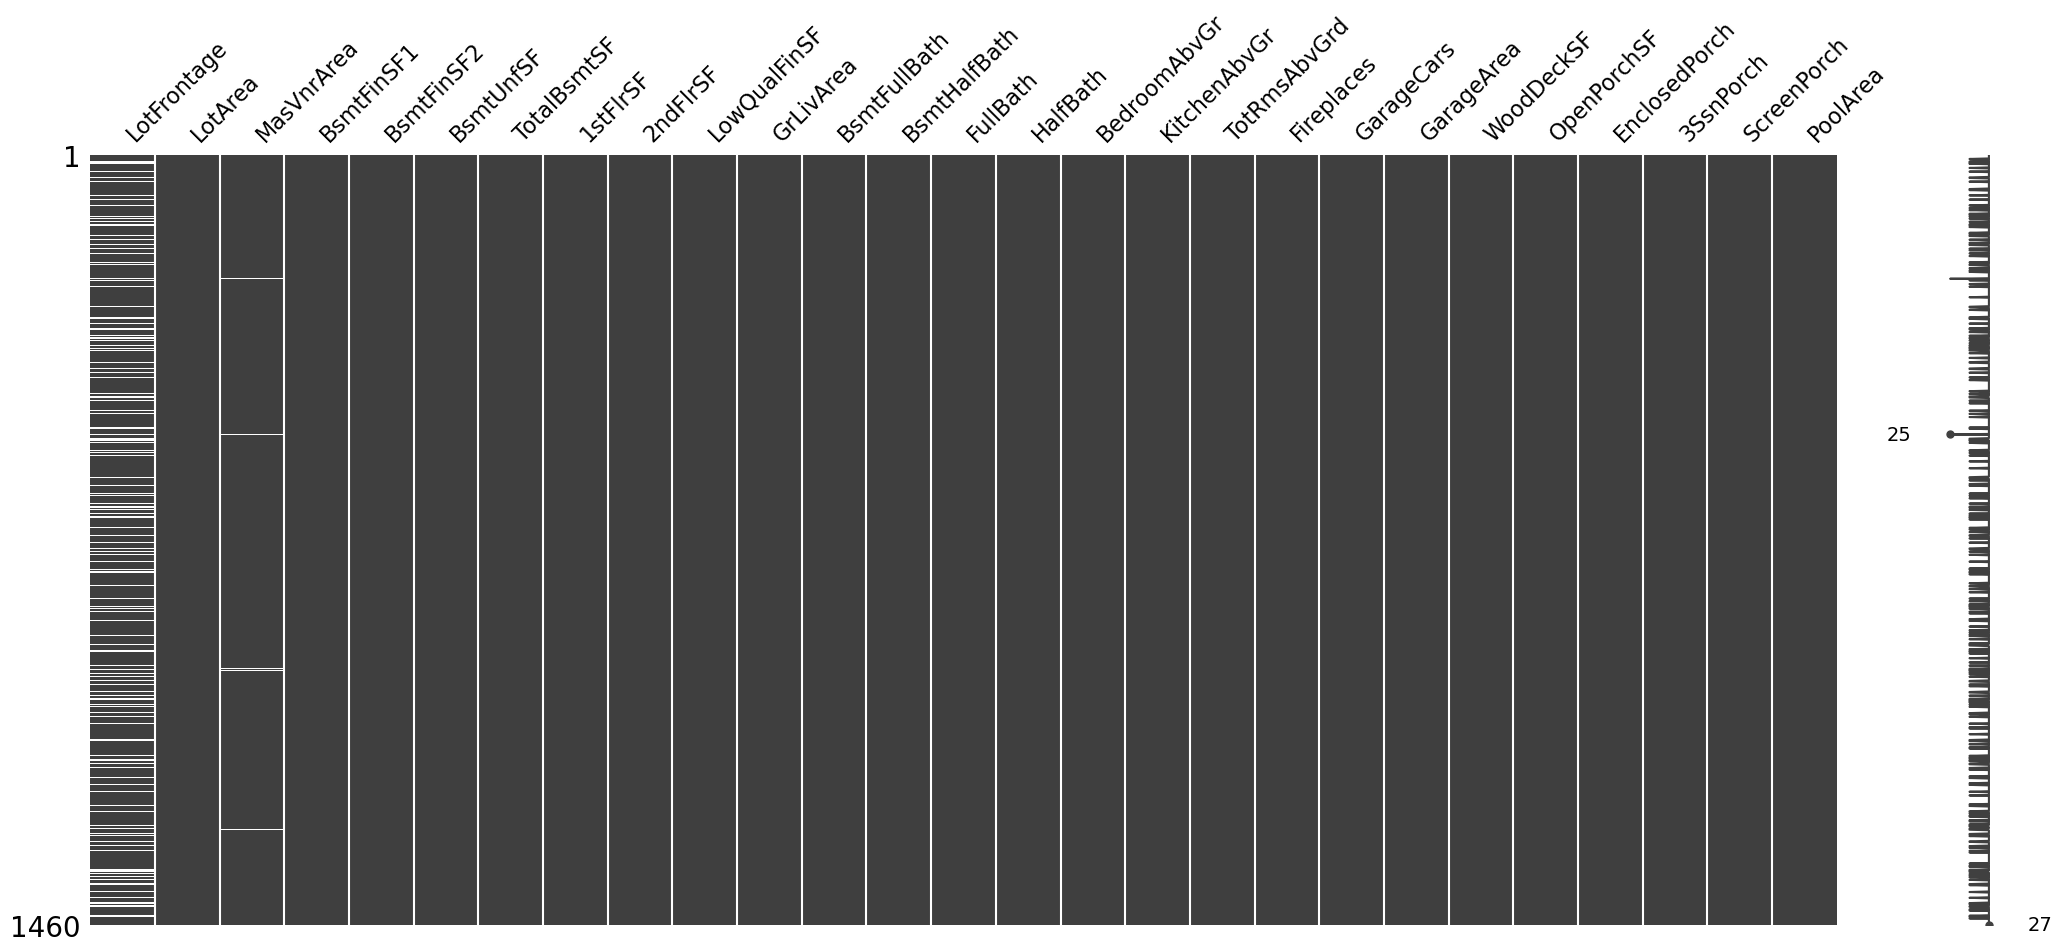

In [12]:
msno.matrix(trn[cols_num])

In [13]:
trn['LotFrontage'].isna().sum(), trn['LotArea'].isna().sum(), trn['MasVnrArea'].isna().sum()

(259, 0, 8)

In [14]:
trn[cols_num].isna().sum(axis=0)

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
dtype: int64

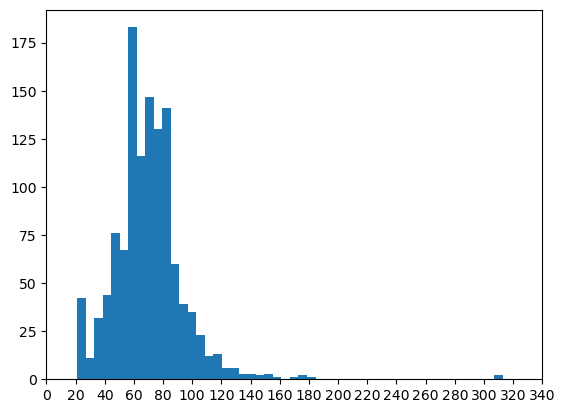

In [15]:
plt.hist(trn['LotFrontage'], bins=50)
plt.xticks(ticks=np.arange(0, 360, 20))
plt.show()

In [16]:
trn['LotFrontage'] = trn['LotFrontage'].fillna(trn['LotFrontage'].mean())

In [17]:
trn['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

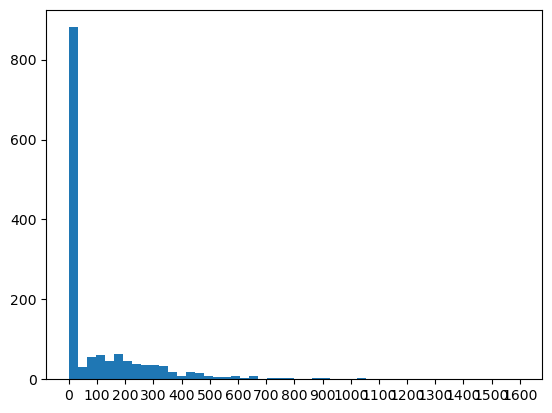

In [18]:
plt.hist(trn['MasVnrArea'], bins=50)
plt.xticks(ticks=np.arange(0, 1700, 100))
plt.show()

In [19]:
trn['MasVnrArea'] = trn['MasVnrArea'].fillna(0)

In [20]:
X = trn[cols_num]
y = trn['SalePrice']

#### Baseline (only nums)

In [21]:
lin = sk_model_reg(LinearRegression(),X,y, prep=False)

TRAIN:
MAE:		24691.6645701411
MAPE:		0.1473144771526296
MSE:		1378391854.8643675
Max error:	438055.38085675216
TRAIN:
MAE:		25840.003446067643
MAPE:		0.1673033124761213
MSE:		2705418809.356382
Max error:	782417.4093490539


In [22]:
lin = sk_model_reg(LinearRegression(),X,y, prep=True)

TRAIN:
MAE:		24689.870448724247
MAPE:		0.1472903457537688
MSE:		1378386712.9238982
Max error:	437913.7670204076
TRAIN:
MAE:		25839.29302053169
MAPE:		0.1672946884076346
MSE:		2705068897.353283
Max error:	782340.0771397159


In [23]:
lin = sk_model_reg(LinearRegression(),X,y, prep=True, scaler=MinMaxScaler())

TRAIN:
MAE:		24693.22496847964
MAPE:		0.14734691925182147
MSE:		1378292955.9692733
Max error:	438061.60667673755
TRAIN:
MAE:		25841.731949263878
MAPE:		0.16734506041442995
MSE:		2705865428.826748
Max error:	782400.2289745959


#### Categorial features

In [24]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
cols_cat = [
    'MSSubClass', 
    'MSZoning', 
    'Street', 
    'Alley', 
    'LotShape', 
    'LandContour', 
    'Utilities', 
    'LotConfig', 
    'LandSlope', 
    'Neighborhood', 
    'Condition1', 
    'Condition2', 
    'BldgType', 
    'HouseStyle', 
    'OverallQual', 
    'OverallCond', 
    'RoofStyle', 
    'RoofMatl', 
    'Exterior1st', 
    'Exterior2nd', 
    'MasVnrType', 
    'ExterQual', 
    'ExterCond', 
    'Foundation', 
    'BsmtQual', 
    'BsmtCond', 
    'BsmtExposure', 
    'BsmtFinType1', 
    'BsmtFinType2', 
    'Heating', 
    'HeatingQC', 
    'CentralAir', 
    'Electrical', 
    'KitchenQual', 
    'FireplaceQu', 
    'GarageType', 
    'GarageFinish', 
    'GarageQual', 
    'GarageCond', 
    'PavedDrive', 
    'PoolQC', 
    'Fence', 
    'MiscFeature', 
    'SaleType', 
    'SaleCondition'
            ]

In [26]:
trn[cols_cat]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<AxesSubplot: >

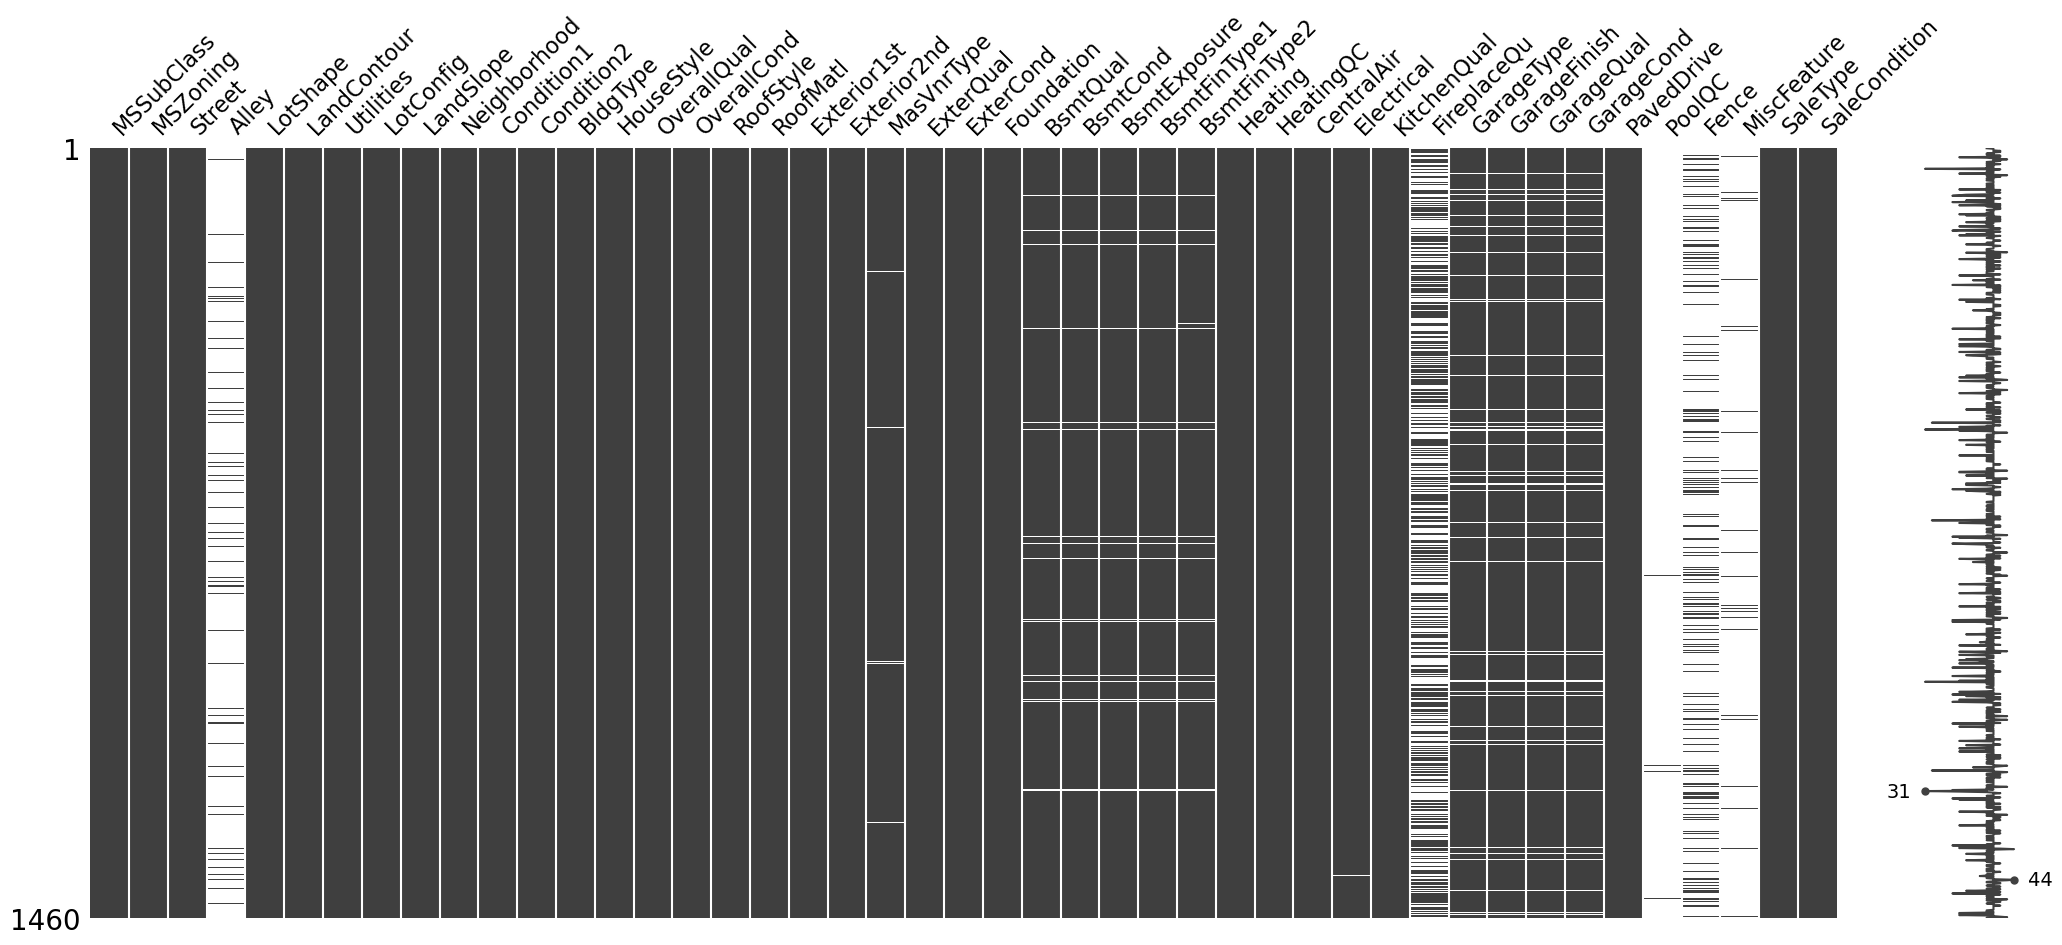

In [27]:
msno.matrix(trn[cols_cat])

In [28]:
trn[['FireplaceQu', 'Fence']].isna().sum(axis=0)

FireplaceQu     690
Fence          1179
dtype: int64

In [29]:
# drop features
trn = trn.drop(columns=['Alley','PoolQC','MiscFeature','Fence'])

##### MSZoning

In [30]:
trn['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [31]:
ohe = pd.get_dummies(trn['MSZoning'], prefix='MSZoning')
trn = pd.concat([trn, ohe], axis=1).drop(columns=['MSZoning'])

##### Street

In [32]:
trn['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [33]:
trn = trn.drop(columns=['Street'])

##### LotShape ?

In [34]:
trn['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [35]:
ohe = pd.get_dummies(trn['LotShape'], prefix='LotShape')
trn = pd.concat([trn, ohe], axis=1).drop(columns=['LotShape'])

##### LandContour ?

In [36]:
trn['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [37]:
ohe = pd.get_dummies(trn['LandContour'], prefix='LandContour')
trn = pd.concat([trn, ohe], axis=1).drop(columns=['LandContour'])

##### Utilities

In [38]:
trn['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [39]:
trn = trn.drop(columns=['Utilities'])

##### LotConfic ?

In [40]:
trn['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [41]:
ohe = pd.get_dummies(trn['LotConfig'], prefix='LotConfig')
trn = pd.concat([trn, ohe], axis=1).drop(columns=['LotConfig'])

##### LandSlope ?

In [42]:
trn['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [43]:
ohe = pd.get_dummies(trn['LandSlope'], prefix='LandSlope')
trn = pd.concat([trn, ohe], axis=1).drop(columns=['LandSlope'])

##### Neighborhood

In [44]:
trn['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [45]:
ohe = pd.get_dummies(trn['Neighborhood'], prefix='Neighborhood')
trn = pd.concat([trn, ohe], axis=1).drop(columns=['Neighborhood'])

##### Condition 1 and 2

In [46]:
trn['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [47]:
trn['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [48]:
trn[trn['Condition2']!='Norm'][['Condition1','Condition2']]

,Condition1,Condition2
9,Artery,Artery
29,Feedr,RRNn
63,RRAn,Feedr
88,Feedr,Feedr
184,RRAn,Feedr
523,PosN,PosN
531,RRNn,Feedr
548,Feedr,RRNn
583,Artery,PosA
589,RRAn,Feedr


In [49]:
for idx in trn['Condition1'].value_counts().index:
    trn['Condition_'+idx] = 0

In [50]:
def get_condition(col1, col2):
    if col1 == 'Feedr' or col2 =='Feedr':
        return 1
    else:
        return 0

In [51]:
trn['Condition_Feedr'] = trn.apply(lambda x: get_condition(x['Condition1'], x['Condition2']), axis=1)

In [52]:
trn[trn['Condition_Feedr']==1][['Condition1','Condition2','Condition_Feedr']]

,Condition1,Condition2,Condition_Feedr
1,Feedr,Norm,1
29,Feedr,RRNn,1
30,Feedr,Norm,1
63,RRAn,Feedr,1
88,Feedr,Feedr,1
...,...,...,...
1321,Feedr,Norm,1
1336,Feedr,Norm,1
1337,Feedr,Norm,1
1360,Feedr,Norm,1
